In [1]:
from fastai.vision.all import *

#### Getting the data into `DataLoaders`

In [2]:
path = untar_data(URLs.CIFAR, dest='data')

In [3]:
path.ls()

(#3) [Path('data/cifar10/train'),Path('data/cifar10/labels.txt'),Path('data/cifar10/test')]

In [4]:
Path.PATH_BASE = path/'data'/'cifar10'

In [5]:
(path/'train').ls()

(#10) [Path('data/cifar10/train/horse'),Path('data/cifar10/train/dog'),Path('data/cifar10/train/ship'),Path('data/cifar10/train/frog'),Path('data/cifar10/train/truck'),Path('data/cifar10/train/deer'),Path('data/cifar10/train/airplane'),Path('data/cifar10/train/automobile'),Path('data/cifar10/train/cat'),Path('data/cifar10/train/bird')]

In [6]:
(path/'train'/'horse').ls()

(#5000) [Path('data/cifar10/train/horse/956_horse.png'),Path('data/cifar10/train/horse/3854_horse.png'),Path('data/cifar10/train/horse/14910_horse.png'),Path('data/cifar10/train/horse/44166_horse.png'),Path('data/cifar10/train/horse/28759_horse.png'),Path('data/cifar10/train/horse/13200_horse.png'),Path('data/cifar10/train/horse/5168_horse.png'),Path('data/cifar10/train/horse/34335_horse.png'),Path('data/cifar10/train/horse/39513_horse.png'),Path('data/cifar10/train/horse/20699_horse.png')...]

In [7]:
horses = get_image_files(path/'train'/'horse')

In [8]:
horses

(#5000) [Path('data/cifar10/train/horse/956_horse.png'),Path('data/cifar10/train/horse/3854_horse.png'),Path('data/cifar10/train/horse/14910_horse.png'),Path('data/cifar10/train/horse/44166_horse.png'),Path('data/cifar10/train/horse/28759_horse.png'),Path('data/cifar10/train/horse/13200_horse.png'),Path('data/cifar10/train/horse/5168_horse.png'),Path('data/cifar10/train/horse/34335_horse.png'),Path('data/cifar10/train/horse/39513_horse.png'),Path('data/cifar10/train/horse/20699_horse.png')...]

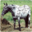

In [9]:
Image.open(horses[0])

In [10]:
data_block = DataBlock(
    # Tell the DataBlock the types of our (independent, dependent) variables.
    # In this instance our independent variables are images so we use the ImageBlock.
    # Our independent variables are categories hence CategoryBlock
    blocks=(ImageBlock, CategoryBlock),
    # Pass a function that retrieves all the data itmes from the source that we'll
    # provide. This get_image_files function recursively retrieves paths to all the
    # image files in some directory
    get_items=get_image_files,
    # Pass a function that will be applied to each data item that'll tell us how
    # to get the label/independent variable of that item. Since we have paths, we
    # use parent_label to get the name of the directory the file is in
    get_y=parent_label,
    # Indicate how to separate the data into training and validation sets. By default
    # RandomSplitter will take 20% of the indices of the data items list at random and
    # use those as the validation set. We can specify if we want to use a larger percentage.
    # Setting the seed argument ensures that we get the same split each time.
    splitter=RandomSplitter(seed=42)
)

In [11]:
dataloaders = data_block.dataloaders(path/'train')

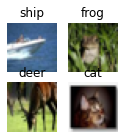

In [12]:
dataloaders.show_batch(max_n=4, figsize=(2, 2))

We can use the `summary` method to see the steps taken when creating the data block. We can use this to ensure that everything is behaving as expected

In [13]:
data_block.summary(path/'train')

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Sett

#### Training a model

We use fastai's builtin convolutional neural net with the resnet architecture

In [14]:
learner = cnn_learner(dataloaders, resnet18, metrics=error_rate)

Use fastai's learning rate finder to choose a learning rate for fine tuning

SuggestedLRs(valley=0.0008317637839354575)

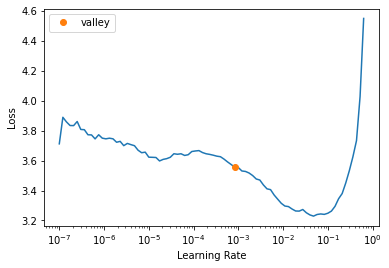

In [15]:
learner.lr_find()

In [16]:
learner.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.710963,1.554631,0.544400,00:25


epoch,train_loss,valid_loss,error_rate,time
0,1.016620,0.915868,0.316700,00:25
1,0.778349,0.722285,0.244600,00:24
2,0.593184,0.660751,0.224700,00:25
3,0.348768,0.674468,0.213000,00:25
4,0.219619,0.706846,0.210600,00:25


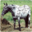

In [17]:
horse_img = Image.open(horses[0]); horse_img

Viewing this image as a PyTorch tensor

In [18]:
tensor_img = tensor(horse_img)

In [19]:
tensor_img.shape

torch.Size([32, 32, 3])

Use permute to swap the order of the axes so that the channels is the first axis

In [20]:
tensor_img = tensor_img.permute(2, 0, 1)

In [21]:
tensor_img.shape

torch.Size([3, 32, 32])

View rows 4 to 9 and columns 4 to 9 of all 3 channels

In [22]:
tensor_img[:, 4:10, 4:10]

tensor([[[ 95, 128,  74, 116, 170, 160],
         [173, 145,  95, 133, 180, 173],
         [157, 133, 136, 126, 126, 143],
         [109, 132, 108,  64,  64,  88],
         [113,  87,  87,  75,  47,  31],
         [126, 116, 101,  64,  41,  34]],

        [[ 91, 131,  73, 127, 189, 177],
         [176, 139,  91, 132, 183, 175],
         [147, 125, 132, 123, 126, 144],
         [ 96, 128, 104,  53,  53,  80],
         [107,  83,  82,  64,  31,  14],
         [120, 112, 101,  55,  20,  14]],

        [[ 81, 122,  68, 104, 158, 154],
         [154, 144,  95, 135, 187, 183],
         [143, 128, 137, 130, 135, 150],
         [101, 133, 110,  62,  65,  91],
         [116,  92,  90,  75,  44,  28],
         [131, 121, 109,  66,  36,  28]]], dtype=torch.uint8)

When our image is in the form of a tensor we can use fastai's `show_image` function to view it

<AxesSubplot:>

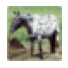

In [23]:
show_image(tensor_img)